In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

"""
Load data from a JSON line file into a DataFrame.

Args:
file_path (str): The file path to the JSON line format dataset.

Returns:
pandas.DataFrame: The loaded data.
"""


df_ga = pd.read_json(r'..\PI MLOps - STEAM\steam_games.json\output_steam_games.json', lines=True)
df_ga

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [17]:
df_ga.isnull().all(axis=1).sum()

88310

## Removal of Completely Null Records

Upon inspection of the DataFrame, we notice that there are 88310 entire records where all columns contain the value None. These records do not provide any useful information and can skew the results of any analysis conducted. Therefore, it's crucial to remove these records during the ETL (Extract, Transform, Load) process to ensure data integrity and quality.


### Actions to consider
Data Cleaning: Remove these completely null rows to clean your dataset. This will simplify further analysis and ensure that models trained on this data do not ingest irrelevant input.

Data Integrity Checks: Investigate the data collection or data entry process to understand why such a high number of rows have no data. This could be due to errors in the data pipeline or issues with the source of the data.

Quality Control: Implement quality control measures to prevent or flag issues where data is missing or not being captured as expected.

Reassessment of Data Requirements: Consider whether the current data collection strategy aligns with the analytical requirements. If certain fields are consistently empty and not needed, they might not need to be collected in the future.

---

In [12]:
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


## Initial DataFrame Exploration
Upon initial inspection of the DataFrame information, we can see several columns containing non-null data and their data types. Here are some step recommendations to enhance data quality and prepare it for more detailed analysis.

### Data Processing Recommendations
#### Publisher Column:
With only 24,083 non-null entries out of 120,445, this column has many missing values. It would be beneficial to investigate whether the missing values indicate something specific or are due to data collection errors.
Depending on the column's relevance to the analysis, one could consider data imputation.

#### Genres Column:
The genres column has 28,852 non-null entries and is of the object type, suggesting it may contain lists or strings. It's important to normalize this column so that each genre has its own binary column (hot-encoding) or consider creating a separate table if a many-to-many relationship is to be maintained.

#### App_Name and Title Columns:
These columns seem to contain similar information and have a similar count of non-null values. Verify if they contain duplicate information or if one is a subset of the other, and consider merging them or removing one if redundant.

#### URL Column:
The URL column has 32,135 non-null entries. If these URLs are not going to be used in the analysis, consider removing this column to reduce the dataset's dimensionality.

#### Release_Date Column:
This column is of object type, indicating that it may not be in date format. It is recommended to convert it to datetime type and extract useful features such as the release year.

#### Tags Column:
Similar to genres, the tags column could benefit from normalization or special handling to separate individual tags for effective analysis.

#### Reviews_URL Column:
Like the URL, if it's not going to be used for analysis, consider removing this column.

#### Specs Column:
Technical specifications could be useful for analysis, but proper processing is needed to separate and correctly categorize different types of specifications.

#### Price Column:
Although marked as an object, this column should be numeric. Convert to float or int after cleaning or transforming the data into numerical formats to enable numerical operations such as calculating the average price.

#### Early_Access Column:
Despite being a float64 type, this column could be a binary categorical variable indicating whether a game is in early access or not. Ensure it is of bool type.

#### ID Column:
It should contain unique identifiers for each game. Verify the uniqueness of this column and consider setting it as the index if all values are unique.

#### Developer Column:
It has a considerable number of missing values and should be of the object type. Normalize this column for consistency and consider how to handle the missing values.

---

## Price Analysis

In [18]:
df_ga['id'].is_unique

False

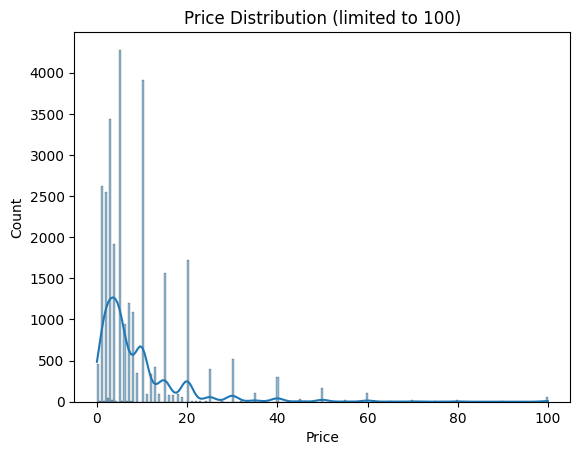

count    29310.000000
mean         9.304903
std         16.165989
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


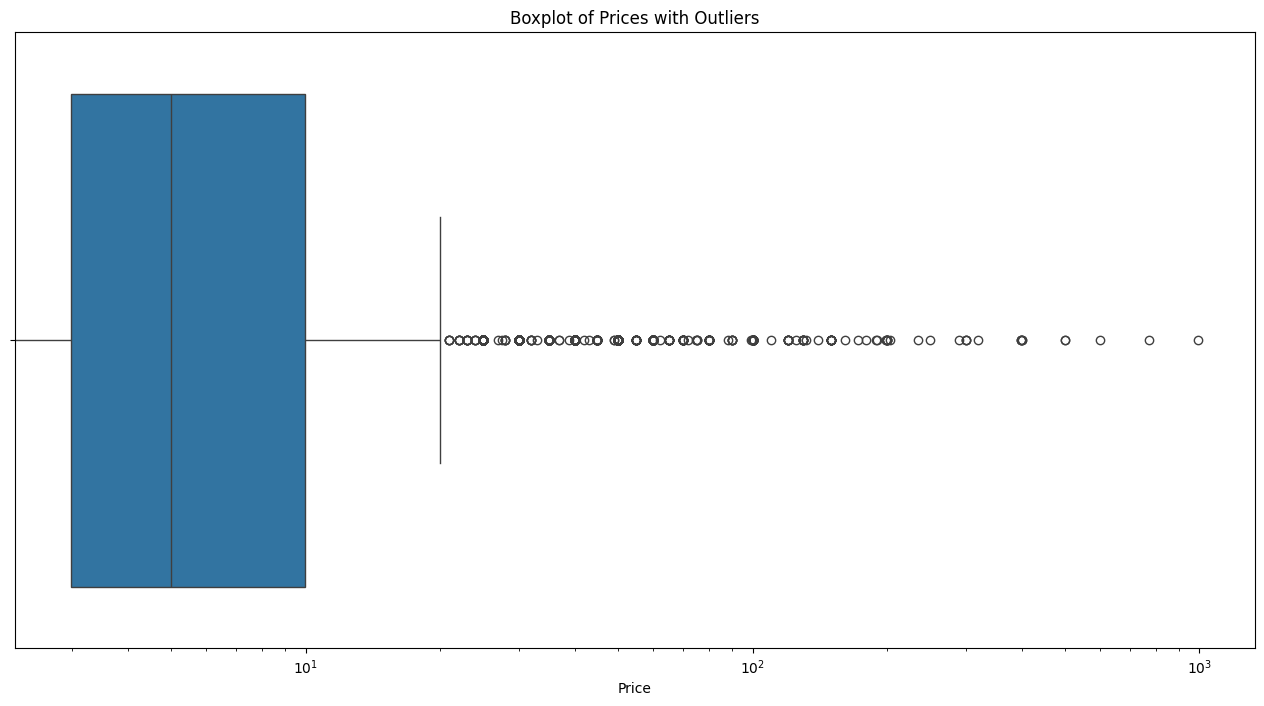

Number of outliers detected: 1883
Outliers as a percentage of the dataset" 1.56%


In [31]:
# Histogram for the price column

# Replacing the string "Free To Play" with 0 and converting to numeric
df_ga['price'] = pd.to_numeric(df_ga['price'].replace('Free To Play', 0), errors='coerce')

# Limiting the X-axis range for the histogram
sns.histplot(df_ga[df_ga['price'] < 100]['price'], kde=True)
plt.title('Price Distribution (limited to 100)')
plt.xlabel('Price')
plt.show()

# Displaying descriptive statistics
print(df_ga['price'].describe())

# Boxplot with outlier markers
plt.figure(figsize=(16,8))
sns.boxplot(x=df_ga['price'])
plt.title('Boxplot of Prices with Outliers')
plt.xlabel('Price')
plt.xscale('log')
plt.show()

# Outlier Anlysis using Interquartile Range (IQR)
Q1 = df_ga['price'].quantile(0.25)
Q3 = df_ga['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_ga['price'] < (Q1 - 1.5 * IQR)) | (df_ga['price'] >(Q3 + 1.5 * IQR)))
print(f'Number of outliers detected: {outliers.sum()}')
print(f'Outliers as a percentage of the dataset" {100 * outliers.sum()/ len(df_ga):.2f}%')

When analyzing the quality of data, particularly focusing on the price column, we can derive the following insights:

- **Handling Null Values**: The presence of 'Free To Play' as a string within the numerical price column indicates that the data collection process doesn't distinguish between free items and paid items with a price of 0. Converting these to a numerical value (0) is necessary for analysis but requires careful documentation to ensure that the meaning of 'free' versus a price not provided is preserved.

- **Skewed Distribution**: The histogram likely reveals a highly skewed distribution with most game prices clustered at the lower end of the scale. Skewed distributions can affect the performance of many data analysis methods and machine learning models that assume a normal distribution.

- **Presence of Outliers**: The boxplot potentially indicates the presence of outliers which are games with exceptionally high prices. From a data quality perspective, it's important to validate whether these outliers are true values or data entry errors.

- **Log Transformation Consideration**: The use of a log scale on the boxplot implies that price data varies over several orders of magnitude. A log transformation could be applied to reduce the skewness of the distribution, making it more symmetrical and easier to analyze.

- **Inconsistencies and Anomalies**: Both visualizations together can help to identify inconsistencies and anomalies in the data. For example, games with a high price but no additional tags or specifications might warrant further investigation to check for data entry issues.

- **Data Integrity**: The high percentage of outliers suggests a review of data collection and entry processes might be required. It's essential to understand the business logic behind what constitutes an outlier in this context and ensure the data reflects this accurately.

- **Statistical Summary**: The descriptive statistics provide a quick numerical summary of the data. For example, a large difference between the mean and median price indicates skewness in the distribution, which has implications for data modeling and the selection of appropriate statistical tests.

From these observations, recommendations for improving data quality could include:

- **Verification of Outliers**: Outliers should be verified to ensure they are not due to incorrect data entry. If they represent special cases, such as deluxe editions or bundles, they should be documented as such.

- **Normalization of Data**: Consider normalizing the price column to handle the skewness and to make the data more amenable to statistical analysis.

- **Robust Data Collection**: Review the data collection process to ensure that prices are being recorded accurately and consistently across all games.

- **Documentation**: All transformations and assumptions should be thoroughly documented to maintain the integrity of the analysis process and provide context for future users of the dataset.